# TitTok Sentiment Analysis -- Joseph Kim, Dec 2024

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud
import warnings
from sklearn.model_selection import train_test_split
import string
import re
from textblob import TextBlob

In [2]:
df = pd.read_excel('tiktok-dataset.xlsx') # make sure that openpyxl is installed

In [3]:
df.head()

,authorMeta/avatar,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/id,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,...,musicMeta/playUrl,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width,webVideoUrl
0,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...,420,13200000,28,150400000,6713126981665686530,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,...,https://sf16-ies-music-sg.tiktokcdn.com/obj/ti...,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720,https://www.tiktok.com/@miso_ara/video/6797294...
1,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,10800,1300000,182,35100000,6929583089811522566,crinka11,Chris Rinker,insta: chrisrinker73,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576,https://www.tiktok.com/@crinka11/video/6958603...
2,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,251,696800,42,15900000,7083448802635596842,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/ie...,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576,https://www.tiktok.com/@iampets_com/video/7083...
3,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,218,510200,56,32100000,7087287470497645573,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62,1024,576,https://www.tiktok.com/@dailydosevideos_/video...
4,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,47600,3300000,690,137300000,6621521206107717638,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,1024,576,https://www.tiktok.com/@jakeypoov/video/681538...


In [4]:
missing_values = df.isnull().sum()
missing_values # there are so many columns with a lot of missing values so be sure not to use

authorMeta/avatar                            0
authorMeta/digg                              0
authorMeta/fans                              0
authorMeta/following                         0
authorMeta/heart                             0
authorMeta/id                                0
authorMeta/name                              0
authorMeta/nickName                         22
authorMeta/signature                        58
authorMeta/verified                          0
authorMeta/video                             0
commentCount                                 0
createTime                                   0
createTimeISO                                0
diggCount                                    0
downloaded                                   0
effectStickers/0/ID                       1120
effectStickers/0/name                     1120
effectStickers/0/stickerStats/useCount    1182
effectStickers/1/ID                       1184
effectStickers/1/name                     1184
effectSticker

In [ ]:
columns_to_drop = [
    'authorMeta/avatar', 
    'authorMeta/digg', 
    'createTime', 
    'diggCount', 
    'effectStickers/0/ID', 
    'effectStickers/0/name', 
    'effectStickers/0/stickerStats/useCount', 
    'effectStickers/1/ID', 
    'effectStickers/1/name', 
    'effectStickers/1/stickerStats/useCount', 
    'hashtags/0/cover', 
    'hashtags/1/cover', 
    'mentions/3', 
    'mentions/4', 
    'mentions/5', 
    'musicMeta/musicAlbum', 
    'videoMeta/height', 
    'videoMeta/width',
    'id', 
    'authorMeta/id',
    'downloaded',
    'hashtags/1/id',
    'mediaUrls/0',
    'musicMeta/playUrl',
    'webVideoUrl'
]

df = df.drop(columns=columns_to_drop)
df.head() # fans, heart, verified, video, commentCount, playCount, shareCount, Hashtag, text, duration

,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,createTimeISO,...,mentions/2,musicMeta/musicAuthor,musicMeta/musicName,musicMeta/musicOriginal,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration
0,13200000,28,150400000,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,303,66000,2020-02-25T12:11:06.000Z,...,NaN,미소아라 Miso_Ara,오리지널 사운드 - Miso_Ara,True,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17
1,1300000,182,35100000,crinka11,Chris Rinker,insta: chrisrinker73,False,518,154100,2021-05-05T00:56:03.000Z,...,NaN,Chris Rinker,original sound,True,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11
2,696800,42,15900000,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",False,90,55300,2022-04-07T14:05:06.000Z,...,NaN,IamPéts,nhạc nền,True,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25
3,510200,56,32100000,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,False,84,70600,2022-05-11T13:15:07.000Z,...,NaN,dailydosevideos,original sound,True,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62
4,3300000,690,137300000,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,247,35500,2020-04-14T02:04:47.000Z,...,NaN,Jake Sherman,original sound,True,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36


In [6]:
# converting from strings to ints
df['authorMeta/verified'] = df['authorMeta/verified'].astype(int)
df['musicMeta/musicOriginal'] = df['musicMeta/musicOriginal'].astype(int)

In [7]:
# converting mention columns into booleans
df['mentions/0'] = df['mentions/0'].fillna(0).apply(lambda x: 1 if x != 0 else 0)
df['mentions/1'] = df['mentions/1'].fillna(0).apply(lambda x: 1 if x != 0 else 0)
df['mentions/2'] = df['mentions/2'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

In [8]:
# brief function to remove the B's and M's from values (search hashtag)
def convert_to_numeric(value):
    if "B" in value:
        value = float(value.strip("B")) * 1_000
    elif "M" in value:
        value = float(value.strip("M")) 
    else:
        value = float(value)
    return value

df['searchHashtag/views'] = df['searchHashtag/views'].apply(convert_to_numeric)

In [9]:
df.describe()

,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/verified,authorMeta/video,commentCount,hashtags/0/id,mentions/0,mentions/1,mentions/2,musicMeta/musicOriginal,playCount,searchHashtag/views,shareCount,videoMeta/duration
count,1.200000e+03,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1.198000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,7.124049e+06,508.820000,1.475789e+08,0.272500,618.774167,53554.415000,2.975124e+16,0.193333,0.037500,0.010833,0.724167,5.468718e+07,4.512025e+05,1.569660e+05,29.741667
std,2.096570e+07,1237.753254,3.599765e+08,0.445431,1598.081980,74139.653978,4.555694e+17,0.395077,0.190063,0.103561,0.447120,5.784957e+07,1.362689e+06,2.546967e+05,28.546173
min,4.180000e+02,0.000000,6.064000e+03,0.000000,1.000000,0.000000,5.690000e+02,0.000000,0.000000,0.000000,0.000000,9.225000e+03,2.200000e+00,0.000000e+00,0.000000
25%,2.792000e+05,38.000000,8.200000e+06,0.000000,113.000000,8459.000000,1.812100e+04,0.000000,0.000000,0.000000,0.000000,1.447500e+07,8.350000e+03,1.717500e+04,13.000000
50%,1.300000e+06,131.000000,2.620000e+07,0.000000,315.500000,29500.000000,1.633230e+05,0.000000,0.000000,0.000000,1.000000,3.690000e+07,8.570000e+04,6.515000e+04,19.000000
75%,4.525000e+06,403.250000,1.074000e+08,1.000000,754.000000,70500.000000,1.396414e+07,0.000000,0.000000,0.000000,1.000000,7.085000e+07,2.884250e+05,1.971750e+05,41.000000
max,1.475000e+08,10000.000000,2.300000e+09,1.000000,34500.000000,715500.000000,7.120048e+18,1.000000,1.000000,1.000000,1.000000,3.548000e+08,9.793300e+06,2.800000e+06,356.000000


### Creating Visualizations of Data: EDA

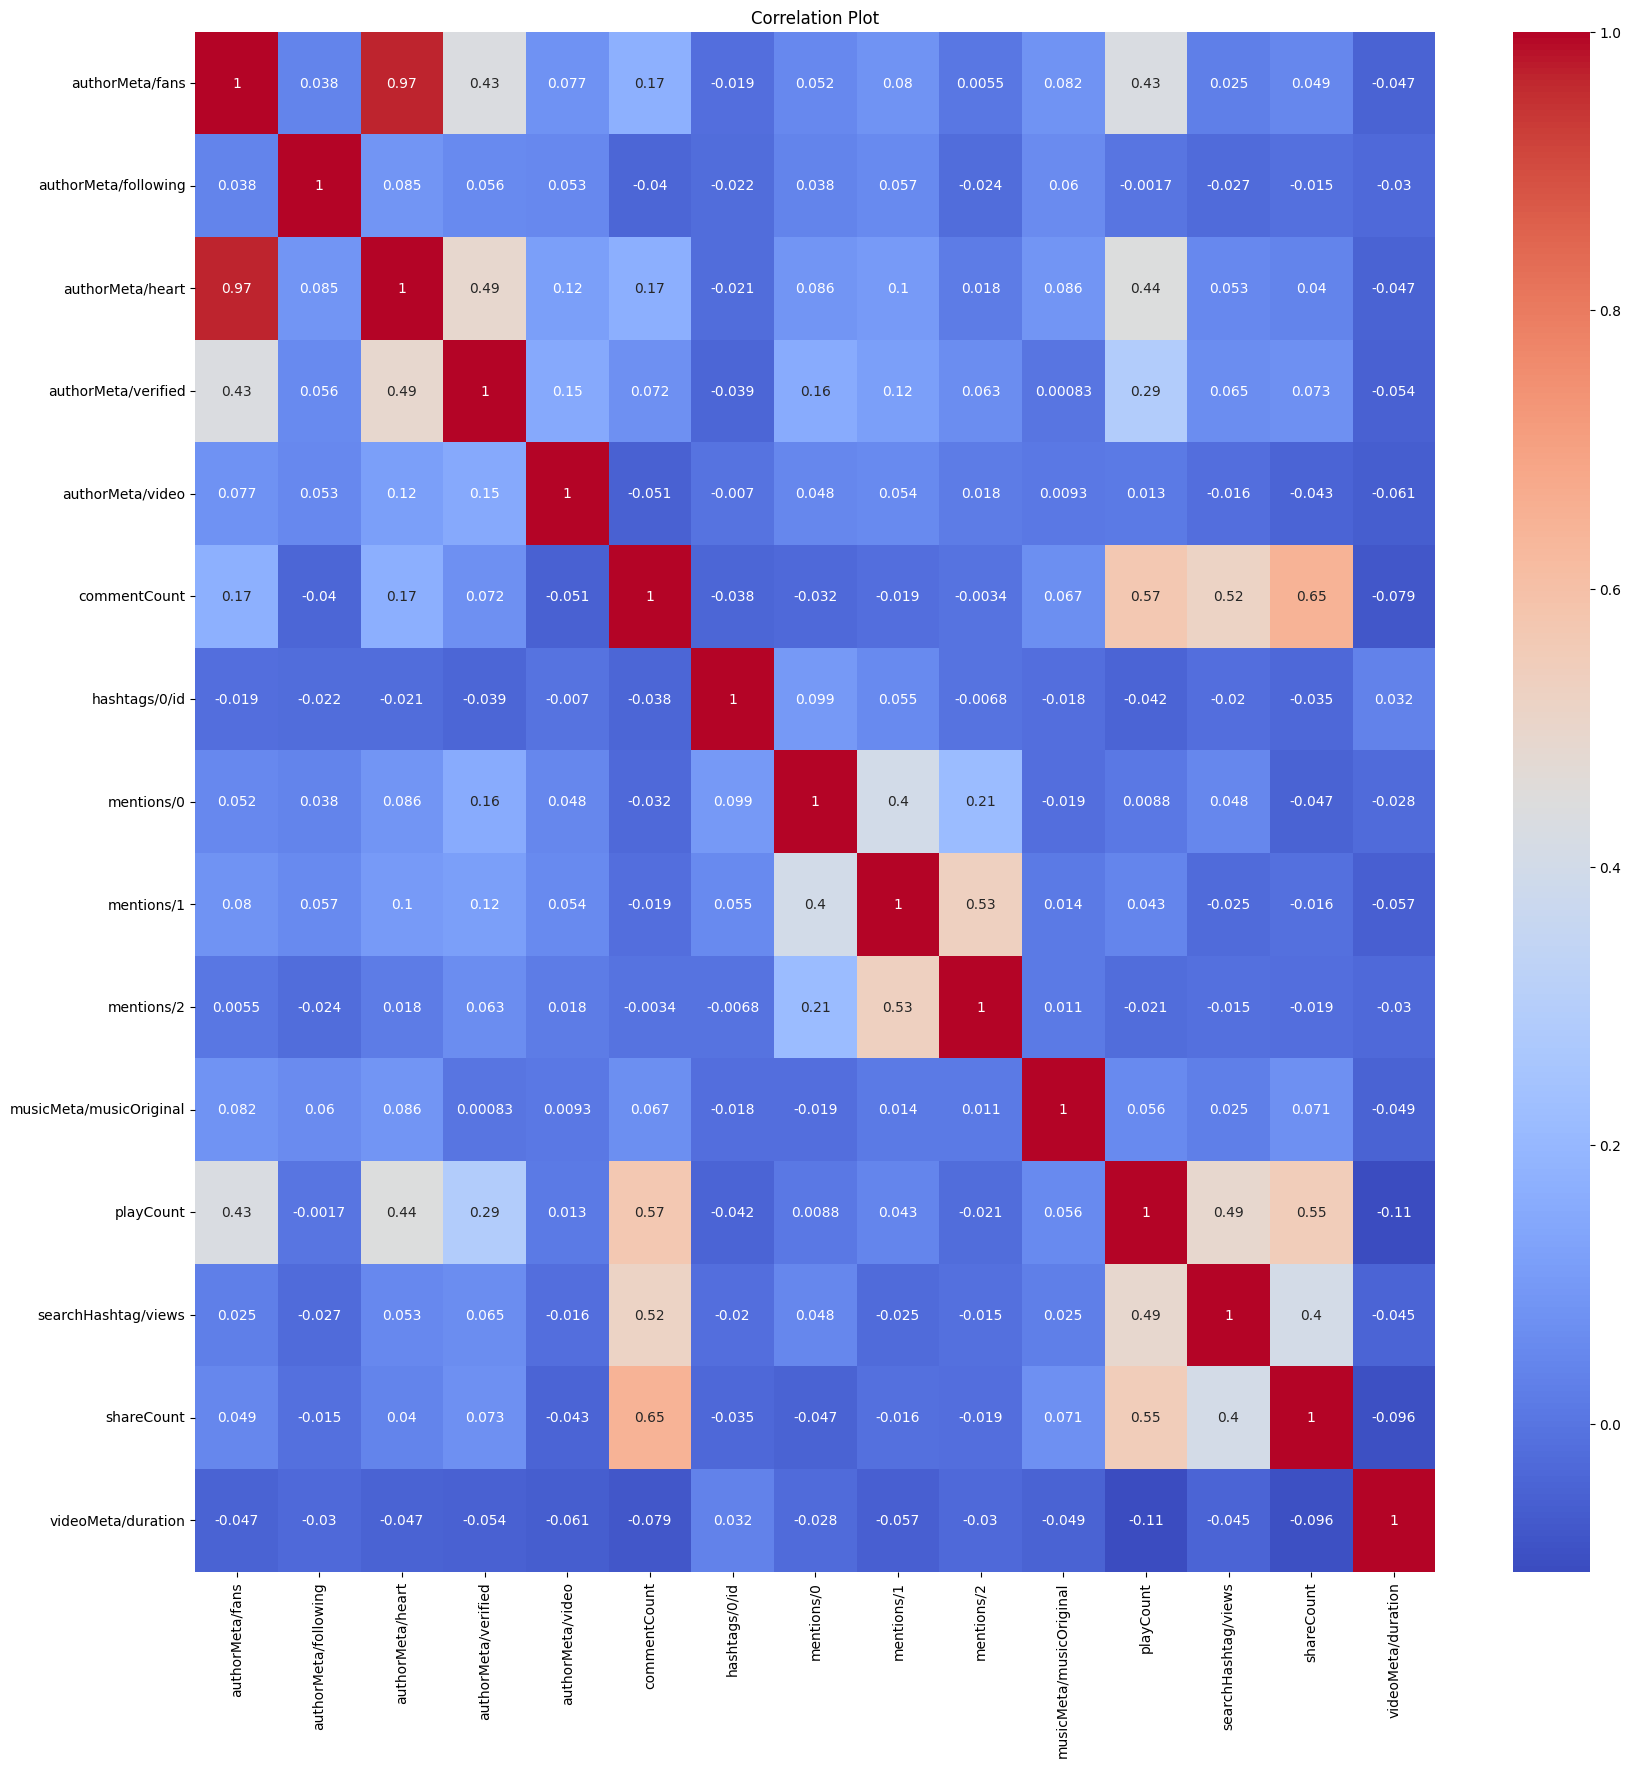

In [10]:
# creating correlation plot for all the numerical values with matplotlib and seaborn
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Plot')
plt.show()

# correlations with hearts and fans, as well as comments, plays, shares, and search hashtag -- implications of sensitivity analysis

Statistical Analysis: Testing whether number of likes is associated with a video's audio choice (Chi-squared test of association)

In [11]:
from scipy.stats import chi2_contingency

In [12]:
# creating categories based on amount of likes for a creator
likes_bins = [-np.inf, df['authorMeta/heart'].quantile(0.25), df['authorMeta/heart'].quantile(0.75), np.inf]
likes_labels = ['low', 'medium', 'high']
df['likes_category'] = pd.cut(df['authorMeta/heart'], bins = likes_bins, labels = likes_labels)

In [13]:
# creating a contingency table 
contingency_table = pd.crosstab(df['musicMeta/musicName'], df['likes_category'])

# performing Chi-square test of independece to see association between variables
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p
# p-value of 1.38e5, which is significantly low

(1093.4226162290481, 1.3803283537242877e-05)

C:\Users\josep\AppData\Local\Temp\ipykernel_15424\2933948415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = music_counts.index, x = music_counts.values, palette = 'viridis')


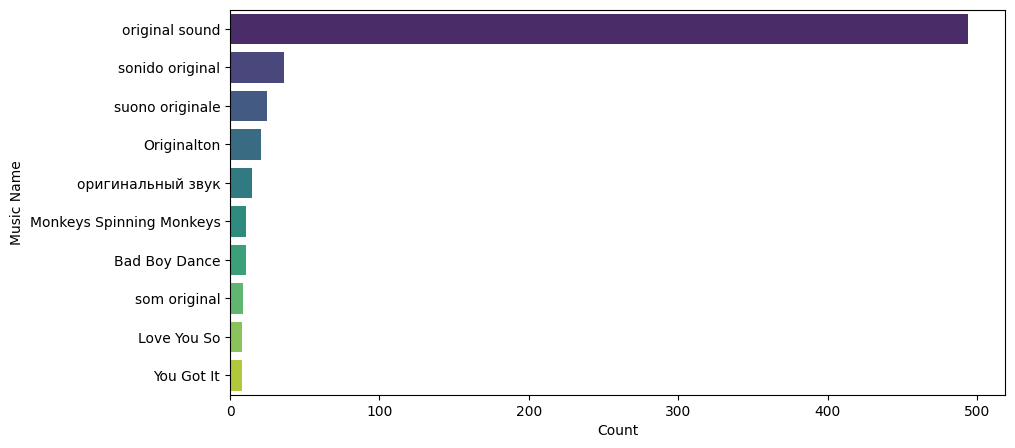

In [14]:
# plot the top 10 audios and corresponding likes
music_counts = df['musicMeta/musicName'].value_counts().head(10)

plt.figure(figsize = (10,5))
sns.barplot(y = music_counts.index, x = music_counts.values, palette = 'viridis')
plt.xlabel('Count')
plt.ylabel('Music Name')
plt.show()

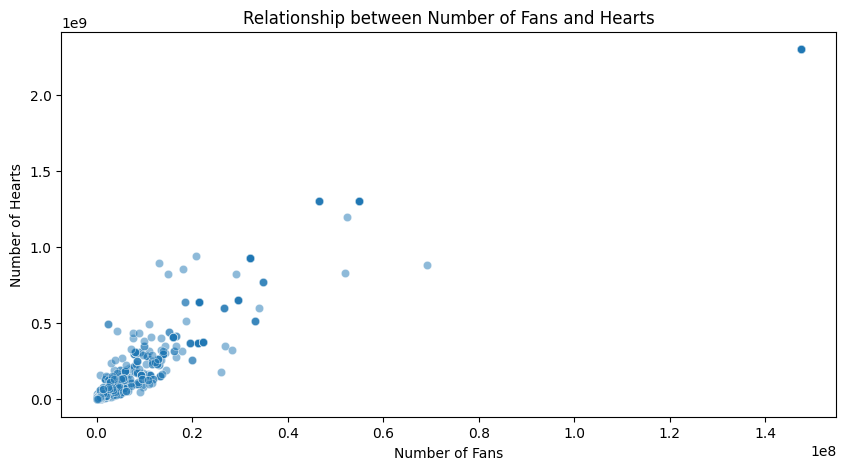

In [15]:
# plotting relationship between number of fans and number of total likes
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'authorMeta/fans', y = 'authorMeta/heart', data = df, alpha = 0.5)
plt.xlabel('Number of Fans')
plt.ylabel('Number of Hearts')
plt.title('Relationship between Number of Fans and Hearts')
plt.show()

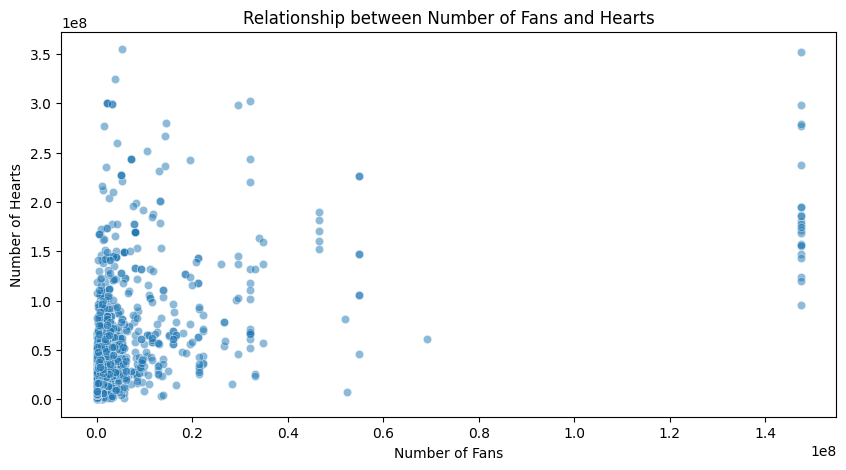

In [16]:
# plotting relationship between number of fans and number of plays per video
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'authorMeta/fans', y = 'playCount', data = df, alpha = 0.5)
plt.xlabel('Number of Fans')
plt.ylabel('Number of Hearts')
plt.title('Relationship between Number of Fans and Hearts')
plt.show()

Testing if verified status brings more views

In [17]:
from scipy.stats import ttest_ind

In [18]:
group1 = df[df['authorMeta/verified'] == True]['playCount']
group2 = df[df['authorMeta/verified'] == False]['playCount']
t_statistic, p_value = ttest_ind(group1, group2, equal_var = False)
t_statistic, p_value # 8.5e-18 p-value is significantly low

(8.961514027035058, 8.521384539642615e-18)

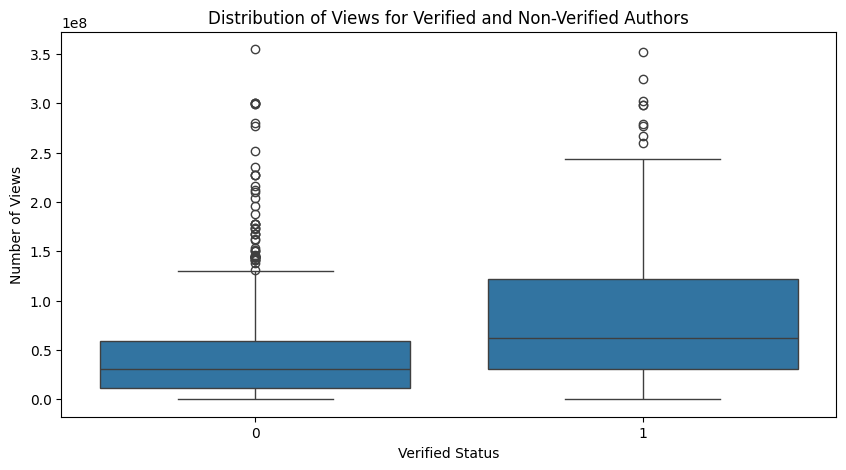

In [19]:
# plot the results with a boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'authorMeta/verified', y = 'playCount', data = df)
plt.xlabel('Verified Status')
plt.ylabel('Number of Views')
plt.title('Distribution of Views for Verified and Non-Verified Authors')
#plt.yscale('log')
plt.show() 
# generally speaking, there are more outliers in the non-verified status - this checks out

In [20]:
group1_likes = df[df['authorMeta/verified'] == True]['authorMeta/heart']
group2_likes = df[df['authorMeta/verified'] == False]['authorMeta/heart']
t_statistic, p_value = ttest_ind(group1_likes, group2_likes, equal_var = False)
t_statistic, p_value # 4.4e-28 p-value is significantly low -- verified users get more likes

(12.08786587277748, 4.354270652335838e-28)

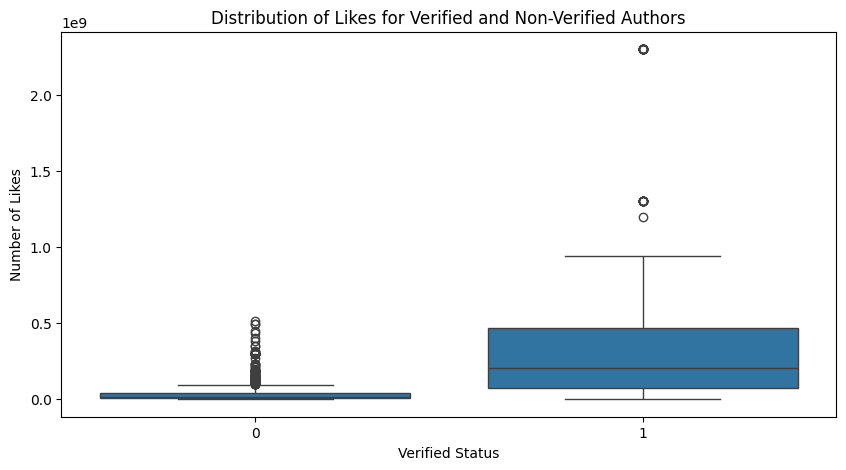

In [21]:
# plot the results with a boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'authorMeta/verified', y = 'authorMeta/heart', data = df)
plt.xlabel('Verified Status')
plt.ylabel('Number of Likes')
plt.title('Distribution of Likes for Verified and Non-Verified Authors')
#plt.yscale('log')
plt.show() 
# generally speaking, there are more outliers in the non-verified status - this checks out

### Sentiment Analysis

Clean and Process the Data

In [22]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize, PunktSentenceTokenizer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
def custom_word_tokenize(text): # no idea why but word_tokenize is not working -- make a custom function that does almost the same thing
    tokenizer = PunktSentenceTokenizer()
    sentences = tokenizer.tokenize(text)
    words = []
    for sentence in sentences:
        words.extend(sentence.split())
    return words

In [24]:
# simple function to preprocess the texts for hashtags and bios

def preprocess_text(text):
    if isinstance(text, str):
        # convert all to lowercase
        text = text.lower()
        
        # remove punctuation and all special characters
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\W', ' ', text)
        text = re.sub('\s+', ' ', text).strip()

        # tokenizing the text -- segmenting text into vectors into numerical data structures (in this case, based on words)
        words = custom_word_tokenize(text)

        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]

        return ' '.join(words)
    
    else:
        return ''

In [25]:
sample_text = "This is a test sentence for preprocessing!"
print(preprocess_text(sample_text))

test sentence preprocessing


In [26]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df['cleaned_sig'] = df['authorMeta/signature'].apply(preprocess_text)
df.head()

,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,authorMeta/video,commentCount,createTimeISO,...,musicMeta/musicOriginal,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,likes_category,cleaned_text,cleaned_sig
0,13200000,28,150400000,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,1,303,66000,2020-02-25T12:11:06.000Z,...,1,200600000,meme,556000.0,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,high,ara woah woah woahchallenge foryou fyp meme 이아...,soonentsoonentcokr miso ara ig
1,1300000,182,35100000,crinka11,Chris Rinker,insta: chrisrinker73,0,518,154100,2021-05-05T00:56:03.000Z,...,1,79600000,meme,556000.0,205400,#fyp #meme #funny #meme #vine,11,medium,fyp meme funny meme vine,insta chrisrinker73
2,696800,42,15900000,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",0,90,55300,2022-04-07T14:05:06.000Z,...,1,106100000,meme,556000.0,323000,The end #funny #funnyvideos #animals #haha #me...,25,medium,end funny funnyvideos animals haha meme dog ca...,pet supplies toys online store products video ...
3,510200,56,32100000,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,0,84,70600,2022-05-11T13:15:07.000Z,...,1,72500000,meme,556000.0,133400,Try not to laugh hard #meme #trynottolaughtik...,62,medium,try laugh hard meme trynottolaughtiktoktv,daily dose videosmemes support page want
4,3300000,690,137300000,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,1,247,35500,2020-04-14T02:04:47.000Z,...,1,62700000,meme,556000.0,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,high,mask abbysherm follow insta jakeypoov fyp vent...,im vent guy


Get Sentiment Polarity with textblob

In [27]:
# create sentiment classification function using TextBlob
def sentiment_class(text): 
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    if sentiment < 0: 
        return 0 # negative sentiment detected
    else: 
        return 1 # positive sentiment

In [28]:
df['sentiment'] = df['cleaned_text'].apply(sentiment_class)
print(df.loc[:, ['cleaned_text', 'sentiment']])

                                           cleaned_text  sentiment
0     ara woah woah woahchallenge foryou fyp meme 이아...          1
1                              fyp meme funny meme vine          1
2     end funny funnyvideos animals haha meme dog ca...          1
3             try laugh hard meme trynottolaughtiktoktv          1
4     mask abbysherm follow insta jakeypoov fyp vent...          1
...                                                 ...        ...
1195  tutorial american boy foryoupage foryou fyp da...          1
1196  tiktokcomedy cutebeuty tiktokdance angelsneha ...          1
1197  pep assemblies like fyp foryou pepassembly tik...          1
1198  tiktokindia cutebeuty tiktokdance angelsneha a...          1
1199  go gogogo whosnext trump trump2020 tiktokdance...          1

[1200 rows x 2 columns]


In [29]:
print(df.loc[df['sentiment'] == 0, ['cleaned_text', 'sentiment']])

                                           cleaned_text  sentiment
11    jimmy fallon sooo suspicious like wrong jimmat...          0
16    wee foryou foryoupage tiktok wee funny dog ani...          0
44    stitch gavinfujjj unreal stitch fypシ wtf jokes...          0
48     simple mingweirocks meme fail funny foryou viral          0
49    nobody got hurt everything protected danger vi...          0
...                                                 ...        ...
1096  open round dance dancevideo letsgo mariepoppin...          0
1100               ja ich dress puppet dancer fy wtf fd          0
1109  come lazy forgetful striptok dancer spicygymna...          0
1127                            chorus casual song fypシ          0
1146  pale man art artist makeup drawing panslabyrin...          0

[114 rows x 2 columns]


In [30]:
df['bio_sentiment'] = df['cleaned_sig'].apply(sentiment_class)
print(df.loc[:, ['cleaned_sig', 'bio_sentiment']])

                                            cleaned_sig  bio_sentiment
0                        soonentsoonentcokr miso ara ig              1
1                                   insta chrisrinker73              1
2     pet supplies toys online store products video ...              1
3              daily dose videosmemes support page want              1
4                                           im vent guy              1
...                                                 ...            ...
1195                                  mmthankyou scordn              1
1196                                                 hi              1
1197                                              hello              1
1198                                                 hi              1
1199  john di domenico emmy nominated award winning ...              1

[1200 rows x 2 columns]


In [31]:
print(df.loc[df['bio_sentiment'] == 0, ['cleaned_sig', 'bio_sentiment']])

                                            cleaned_sig  bio_sentiment
18              average trash panda boujee life bandito              0
56                          father fighter artist idiot              0
93    hi likes editing random videosnot minebgm well...              0
97                  paranormal princess see dead people              0
120   awkward pov guy author beashark mgmt leisahome...              0
121   still ur mom seven deadly sins code totiktoklo...              0
122   awkward pov guy author beashark mgmt leisahome...              0
123   awkward pov guy author beashark mgmt leisahome...              0
124   awkward pov guy author beashark mgmt leisahome...              0
127   awkward pov guy author beashark mgmt leisahome...              0
129   awkward pov guy author beashark mgmt leisahome...              0
133   awkward pov guy author beashark mgmt leisahome...              0
138   awkward pov guy author beashark mgmt leisahome...              0
177   

In [32]:
sentiment_metrics = df.groupby('sentiment')[['playCount', 'authorMeta/heart']].mean()
print(sentiment_metrics) # 2.6m more plays with positive sentiment, 17 million likes on average

              playCount  authorMeta/heart
sentiment                                
0          5.234936e+07      1.328275e+08
1          5.493259e+07      1.491274e+08


In [33]:
sentiment_metrics_bio = df.groupby('bio_sentiment')[['playCount', 'authorMeta/heart']].mean()
print(sentiment_metrics_bio) # 18m more plays with positive sentiment, 100+ million likes on average

                  playCount  authorMeta/heart
bio_sentiment                                
0              3.720769e+07      4.938582e+07
1              5.552681e+07      1.522956e+08


Sentiment Impact on Engagement

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
features = df[['sentiment', 'authorMeta/heart', 'authorMeta/fans', 'videoMeta/duration']]
target = df['playCount']

model = LinearRegression()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=69)

model.fit(X_train, y_train)

LinearRegression()

In [37]:
print("Training accuracy: ", model.score(X_train, y_train))
print("Testing accuracy: ", model.score(X_test, y_test))
# based on this dataset, a linear regression model would not be the correct choice - only a slight positive correlation, cannot be entirely predicted

Training accuracy:  0.22029647812247388
Testing accuracy:  0.15651034745728465
